In [ ]:
%pylab inline
import numpy as np
import datetime as dt
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot  as plt

from scipy import stats
from netCDF4 import Dataset

In [21]:
def save(name='', fmt ='png'):
    pwd = os.getcwd()
# iPath = './pictures/{}'.format(fmt)
    iPath='.'
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
# plt.close()
# В этой части кода задается функция на конечный результат. Конечный продукт - графики в формате png.

In [22]:
data_path = 'C:\\Users\\23\\anaconda3\\'
file_u60 = data_path + 'jra55.uwnd.60N_mean.5859-2021.djf.wo29feb.nc'
# В этой части кода загружается файл с данными внезапного стратосферного потепления, которые и будут анализироваться в этой работе. 

In [23]:
file_u60 
# Проверили, что файл прогрузился.

'C:\\Users\\23\\anaconda3\\jra55.uwnd.60N_mean.5859-2021.djf.wo29feb.nc'

In [24]:
ncin=Dataset(file_u60,'r')
w60_djf_6h=ncin.variables['var33'][:]

# lons=ncin.variables['lon'][:]
# lats=ncin.variables['lat'][:]
# levs=ncin.variables['lev'][:]

time=ncin.variables['time'][:]
ncin.close()

# В этой части кода задали переменные времени, широты, долготы, высоты, которые описывают индекс w60, используемый в работе. 

In [25]:
w60_djf_6h.shape
# Проверили, что все работает. 

(22680, 1, 1, 1)

In [26]:
u60_djf = np.squeeze(w60_djf_6h)

In [27]:
u60_djf.shape
# Убрали ненужные значения, вывели значение количества данных. 

(22680,)

In [28]:
u60=np.empty([63, 360])
for i in range (63):
     u60[i, 0:360] = u60_djf[i*360:i*360 + 360]
# Задаем переменную u60 и начинаем ее считать (по этой переменной потом будет строиться график). 

In [29]:
u60.shape

(63, 360)

In [30]:
u60_mean=np.mean(u60, axis=0)
u60_min=np.min(u60, axis=0)
u60_max=np.max(u60, axis=0)
# Посчитали минимум, максимум и среднее. 

In [31]:
u60_min.shape

(360,)

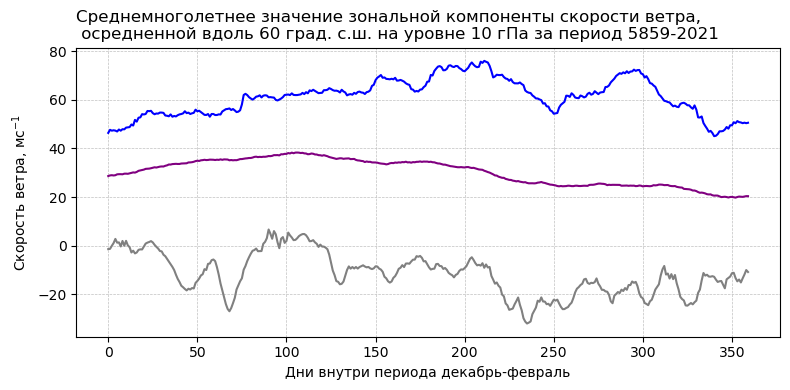

In [32]:
days_u60=np.asarray([[i] for i in range(0, 360, 1)])
fig1=plt.figure(figsize = (8, 4), dpi=100)
ax1=fig1.add_subplot(1, 1, 1, label='1')
gr1=ax1.plot(days_u60, u60_mean, color='purple')
gr2=ax1.plot(days_u60, u60_min, color='grey')
gr3=ax1.plot(days_u60, u60_max, color='blue')

ax1.set_xlabel("Дни внутри периода декабрь-февраль")
ax1.set_ylabel("Скорость ветра, мс$^{-1}$")
ax1.grid(linewidth='0.5', color='silver', linestyle='dashed')
ax1.set_title('Среднемноголетнее значение зональной компоненты скорости ветра,\n осредненной вдоль 60 град. с.ш. на уровне 10 гПа за период 5859-2021',loc='left')

plt.tight_layout()
plt.savefig(data_path + 'u60_10_mean_5859-2021.png')
# В этой части кода строится график и задаются параметры его оформления. 

In [ ]:
fig1=plt.figure(figsize = (8, 4), dpi=100)
ax1=fig1.add_subplot(1, 1, 1, label='1')
gr1=ax1.plot(days_u60, u60[21,:], color='purple')

ax2=fig1.add_subplot(1, 1, 1, label='1')
gr2=ax1.plot(days_u60, u60[12,:], color='pink')

ax1.set_xlabel("Дни внутри периода декабрь-февраль")
ax1.set_ylabel("Скорость ветра, мс$^{-1}$")
ax1.grid(linewidth='0.5', color='silver', linestyle='dashed')
ax1.set_title('Значение зональной компоненты скорости ветра,\n осредненной вдоль 60 град. с.ш. на уровне 10 гПа за зиму 1979-80',loc='left')

ax2.set_title('Значение зональной компоненты скорости ветра,\n осредненной вдоль 60 град. с.ш. на уровне 10 гПа за зиму 1970-71',loc='left')

plt.tight_layout()
#plt.savefig(data_path + 'u60_10_example_particular_year.png')

In [ ]:
fig1 = plt.figure(figsize = (8, 4), dpi=100)
ax1=fig1.add_subplot(1, 1, 1, label='1')
gr1=ax1.plot(days_u60, u60[12,:], color='purple', linewidth='1.5')
gr1=ax1.plot([0, 360], [0, 0], color='red', linewidth='0.8')

ax1.set_xlabel("Дни внутри периода декабрь-февраль")
ax1.set_ylabel("Скорость ветра, мс$^{-1}$")
ax1.grid(linewidth='0.5', color='silver', linestyle='dashed')
ax1.set_title('Значение зональной компоненты скорости ветра,\n осредненной вдоль 60 град. с.ш. на уровне 10 гПа за зиму 1970-71',loc='left')

plt.tight_layout()
#plt.savefig(data_path + 'u60_10_example_ssw_particular_year.png')

In [17]:
u60_new = np.zeros(33)
counter_new = 0
for i in range(63):
    counter = 0
    for j in range(360):
        if counter == 0:
            if u60[i, j] < 0: 
                print(i + 1958, j)
                counter_new += 1
                counter = 1
                j = 359
# Эта часть кода показывает года и дни, когда наблюдались внезапные стратосферные потепления. 

1958 7
1959 186
1962 238
1965 67
1967 149
1968 0
1969 126
1970 191
1972 245
1976 96
1978 331
1980 267
1981 12
1983 339
1984 123
1986 211
1987 27
1988 328
1994 266
1998 56
2000 288
2001 118
2002 193
2003 139
2005 203
2006 340
2007 332
2008 217
2009 280
2012 146
2017 291
2018 126
2020 140


In [18]:
counter_new

33